# Extract PSB devices

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [8]:
script_path = '../nxcals_helpers.py'
with open(script_path, 'r') as file:
    script_code = file.read()
exec(script_code)

In [9]:
accelerator = 'PSB'
timing_user = 'MD2'
selector = f'{accelerator}.USER.{timing_user}'
lsa_cycle = 'MD12463_160MeV_2024'
rings = ['R3']
inout='1'

start_time = "2024-06-26 12:08:00.000"
end_time = "2024-06-26 16:30:00.000"

In [12]:
deviceproperty_list = []
for ring in rings:
    deviceproperty_list.append(f'B{ring}.BWS.11L1.V/Acquisition')
deviceproperty_list.append('BR.BCTDC/Acquisition')

select_list =[]
select_list.append(['cyclestamp','device','aqnStatus',f'acqTimeInCycleSet{inout}','delays',f'bestChannelSet{inout}', 'pmtSelection',f'projPositionSet{inout}', f'projDataSet{inout}'])
select_list.append(['cyclestamp', 'selector', 'totalIntensityRing1','totalIntensityRing2','totalIntensityRing3','totalIntensityRing4'])

df = device_list_to_dataframe(start_time, end_time, deviceproperty_list, select_list=select_list, field2sort='cyclestamp', selector=selector, how='inner')

24/07/12 10:18:02 WARN CheckAllocator: More than one DefaultAllocationManager on classpath. Choosing first found


In [13]:
df

device  aqnStatus  acqTimeInCycleSet1  \
cyclestamp                                                               
2024-06-26 12:08:32.465  BR3.BWS.11L1.V          0                 442   
2024-06-26 12:09:01.265  BR3.BWS.11L1.V          0                 442   
2024-06-26 12:09:30.065  BR3.BWS.11L1.V          0                 442   
2024-06-26 12:09:58.865  BR3.BWS.11L1.V          0                 442   
2024-06-26 12:10:27.665  BR3.BWS.11L1.V          0                 442   
...                                 ...        ...                 ...   
2024-06-26 15:21:42.065  BR3.BWS.11L1.V          0                 454   
2024-06-26 15:22:10.865  BR3.BWS.11L1.V          0                 455   
2024-06-26 15:22:39.665  BR3.BWS.11L1.V          0                 455   
2024-06-26 15:23:08.465  BR3.BWS.11L1.V          0                 455   
2024-06-26 15:23:37.265  BR3.BWS.11L1.V          0                 455   

                                                                    delays  \
cyclestamp                                                                   
2024-06-26 12:08:32.465  {'elements': [470100, 680100], 'dimensions': [2]}   
2024-06-26 12:09:01.265  {'elements': [470200, 680200], 'dimensions': [2]}   
2024-06-26 12:09:30.065  {'elements': [470300, 680300], 'dimensions': [2]}   
2024-06-26 12:09:58.865  {'elements': [470300, 680300], 'dimensions': [2]}   
2024-06-26 12:10:27.665  {'elements': [470500, 680500], 'dimensions': [2]}   
...                                                                    ...   
2024-06-26 15:21:42.065  {'elements': [483000, 693000], 'dimensions': [2]}   
2024-06-26 15:22:10.865  {'elements': [483100, 693100], 'dimensions': [2]}   
2024-06-26 15:22:39.665  {'elements': [483200, 693200], 'dimensions': [2]}   
2024-06-26 15:23:08.465  {'elements': [483300, 693300], 'dimensions': [2]}   
2024-06-26 15:23:37.265  {'elements': [483400, 693400], 'dimensions': [2]}   

                         bestChannelSet1  pmtSelection  \
cyclestamp                                               
2024-06-26 12:08:32.465                1             5   
2024-06-26 12:09:01.265                1             5   
2024-06-26 12:09:30.065                1             5   
2024-06-26 12:09:58.865                1             5   
2024-06-26 12:10:27.665                1             5   
...                                  ...           ...   
2024-06-26 15:21:42.065                1             5   
2024-06-26 15:22:10.865                1             5   
2024-06-26 15:22:39.665                1             5   
2024-06-26 15:23:08.465                1             5   
2024-06-26 15:23:37.265                1             5   

                                                          projPositionSet1  \
cyclestamp                                                                   
2024-06-26 12:08:32.465  {'elements': [51.886116, 51.867016, 51.847953,...   
2024-06-26 12:09:01.265  {'elements': [49.63917, 49.619597, 49.600025, ...   
2024-06-26 12:09:30.065  {'elements': [50.885932, 50.866272, 50.846652,...   
2024-06-26 12:09:58.865  {'elements': [50.573323, 50.553082, 50.532841,...   
2024-06-26 12:10:27.665  {'elements': [50.573323, 50.553041, 50.532841,...   
...                                                                    ...   
2024-06-26 15:21:42.065  {'elements': [49.825989, 49.806409, 49.786829,...   
2024-06-26 15:22:10.865  {'elements': [51.697358, 51.677073, 51.656748,...   
2024-06-26 15:22:39.665  {'elements': [50.386229, 50.366035, 50.345801,...   
2024-06-26 15:23:08.465  {'elements': [51.761025, 51.741967, 51.722947,...   
2024-06-26 15:23:37.265  {'elements': [50.63693, 50.617913, 50.598896, ...   

                                                              projDataSet1  \
cyclestamp                                                                   
2024-06-26 12:08:32.465  {'elements': [157, 187, 226, 220, 206, 293, 22...   
2024-06-26 12:09:01.265  {'elements': [223, 221, 17

In [14]:
def dataframe_process_wirescanner(df):
    df2 = df.copy()
    
    df2['pos_raw'] = df2.apply(lambda row: row['projPositionSet1']['elements'], axis=1)
    df2['amp_raw'] = df2.apply(lambda row: row['projDataSet1']['elements'][(row['bestChannelSet1']-1)*len(row['pos_raw']):(row['bestChannelSet1'])*len(row['pos_raw'])], axis=1)
    df2['scan_time_ms'] = df2.apply(lambda row: row['delays']['elements'][0]/1e3, axis=1)
    df2 = df2.drop('projPositionSet1', axis=1)
    df2 = df2.drop('projDataSet1', axis=1)
    df2 = df2.drop('delays', axis=1)
    
    return df2


def dataframe_process_bct(df, rings, at_ctime=None):
    df2 = df.copy()
    
    for ring in ['R1', 'R2', 'R3', 'R4']:
        if ring in rings:
            df2[f'bct_{ring}'] = df2.apply(lambda row: row[f'totalIntensityRing{ring[-1]}']['elements'], axis=1)
            df2[f'bct_{ring}_ctime'] = df2.apply(lambda row: np.arange(257, 257+len(row[f'bct_{ring}']), 1), axis=1)
            df2[f'bct_{ring}_inj'] = df2.apply(lambda row: row[f'bct_{ring}'][275-257], axis=1)
            if at_ctime != None:
                df2[f'bct_{ring}_C{at_ctime}'] = df2.apply(lambda row: row[f'bct_{ring}'][at_ctime-257], axis=1)
        df2 = df2.drop(f'totalIntensityRing{ring[-1]}', axis=1)
        
    return df2

In [15]:
df2 = dataframe_process_wirescanner(df)
df2 = dataframe_process_bct(df2, rings, at_ctime=475)

In [16]:
df2

device  aqnStatus  acqTimeInCycleSet1  \
cyclestamp                                                               
2024-06-26 12:08:32.465  BR3.BWS.11L1.V          0                 442   
2024-06-26 12:09:01.265  BR3.BWS.11L1.V          0                 442   
2024-06-26 12:09:30.065  BR3.BWS.11L1.V          0                 442   
2024-06-26 12:09:58.865  BR3.BWS.11L1.V          0                 442   
2024-06-26 12:10:27.665  BR3.BWS.11L1.V          0                 442   
...                                 ...        ...                 ...   
2024-06-26 15:21:42.065  BR3.BWS.11L1.V          0                 454   
2024-06-26 15:22:10.865  BR3.BWS.11L1.V          0                 455   
2024-06-26 15:22:39.665  BR3.BWS.11L1.V          0                 455   
2024-06-26 15:23:08.465  BR3.BWS.11L1.V          0                 455   
2024-06-26 15:23:37.265  BR3.BWS.11L1.V          0                 455   

                         bestChannelSet1  pmtSelection    selector_x  \
cyclestamp                                                             
2024-06-26 12:08:32.465                1             5  PSB.USER.MD2   
2024-06-26 12:09:01.265                1             5  PSB.USER.MD2   
2024-06-26 12:09:30.065                1             5  PSB.USER.MD2   
2024-06-26 12:09:58.865                1             5  PSB.USER.MD2   
2024-06-26 12:10:27.665                1             5  PSB.USER.MD2   
...                                  ...           ...           ...   
2024-06-26 15:21:42.065                1             5  PSB.USER.MD2   
2024-06-26 15:22:10.865                1             5  PSB.USER.MD2   
2024-06-26 15:22:39.665                1             5  PSB.USER.MD2   
2024-06-26 15:23:08.465                1             5  PSB.USER.MD2   
2024-06-26 15:23:37.265                1             5  PSB.USER.MD2   

                           selector_y  \
cyclestamp                              
2024-06-26 12:08:32.465  PSB.USER.MD2   
2024-06-26 12:09:01.265  PSB.USER.MD2   
2024-06-26 12:09:30.065  PSB.USER.MD2   
2024-06-26 12:09:58.865  PSB.USER.MD2   
2024-06-26 12:10:27.665  PSB.USER.MD2   
...                               ...   
2024-06-26 15:21:42.065  PSB.USER.MD2   
2024-06-26 15:22:10.865  PSB.USER.MD2   
2024-06-26 15:22:39.665  PSB.USER.MD2   
2024-06-26 15:23:08.465  PSB.USER.MD2   
2024-06-26 15:23:37.265  PSB.USER.MD2   

                                                                   pos_raw  \
cyclestamp                                                                   
2024-06-26 12:08:32.465  [51.886116, 51.867016, 51.847953, 51.828004, 5...   
2024-06-26 12:09:01.265  [49.63917, 49.619597, 49.600025, 49.579896, 49...   
2024-06-26 12:09:30.065  [50.885932, 50.866272, 50.846652, 50.826513, 5...   
2024-06-26 12:09:58.865  [50.573323, 50.553082, 50.532841, 50.512601, 5...   
2024-06-26 12:10:27.665  [50.573323, 50.553041, 50.532841, 50.513182, 5...   
...                                                                    ...   
2024-06-26 15:21:42.065  [49.825989, 49.806409, 49.786829, 49.767251, 4...   
2024-06-26 15:22:10.865  [51.697358, 51.677073, 51.656748, 51.636464, 5...   
2024-06-26 15:22:39.665  [50.386229, 50.366035, 50.345801, 50.325569, 5...   
2024-06-26 15:23:08.465  [51.761025, 51.741967, 51.722947, 51.703005, 5...   
2024-06-26 15:23:37.265  [50.63693, 50.617913, 50.598896, 50.578998, 50...   

                                                                   amp_raw  \
cyclestamp                                                                   
2024-06-26 12:08:32.465  [157, 187, 226, 220, 206, 293, 229, 195, 263, ...   
2024-06-26 12:09:01.265  [223, 221, 178, 181, 231, 172, 236, 196, 190, ...   
2024-06-26 12:09:30.065  [184, 191, 125, 132, 189, 226, 247, 275, 170, ...   
2024-06-26 12:09:58.865  [240, 268, 281, 258, 283, 259, 283, 198, 237, ...   
2024-06-26 12:10:27.665  [297, 206, 183, 206, 238, 159, 199, 137, 187, ...   
...                                   

In [17]:
df3 = df2[df2['bct_R3_inj']>30]
df4 = df3[df3['bct_R3_C475']>30]

In [19]:
f, ax = plt.subplots(1,1,figsize=(15,8))
fontsize=20
ax.set_xlabel('Ctime [ms]', fontsize=fontsize)
ax.set_ylabel('Intensity [10$^{10}$ p]', fontsize=fontsize)
ax.tick_params(axis='both', labelsize=fontsize)
cmap = cm.jet
scan_times = np.unique(df4['scan_time_ms'])
colors = cmap(np.linspace(0,1,len(scan_times)))

for c,scan_time in zip(colors, scan_times):
    dftemp = df4[df4['scan_time_ms']==scan_time]
    for i in range(len(dftemp)):
        ax.plot(dftemp.iloc[i]['bct_R3_ctime'], dftemp.iloc[i]['bct_R3'], c='blue', lw=0.2)
#sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min(scan_times), vmax=max(scan_times)))
#sm._A = []
#cbar=plt.colorbar(sm, ax=ax)
#cbar.ax.tick_params(labelsize=fontsize)
#cbar.set_label('Scan Ctime [ms]', fontsize=fontsize)
    
ax.set_xlim(470, 510)
ax.set_ylim(0)

(0.0, 42.212712180987)

(-20.0, 20.0)

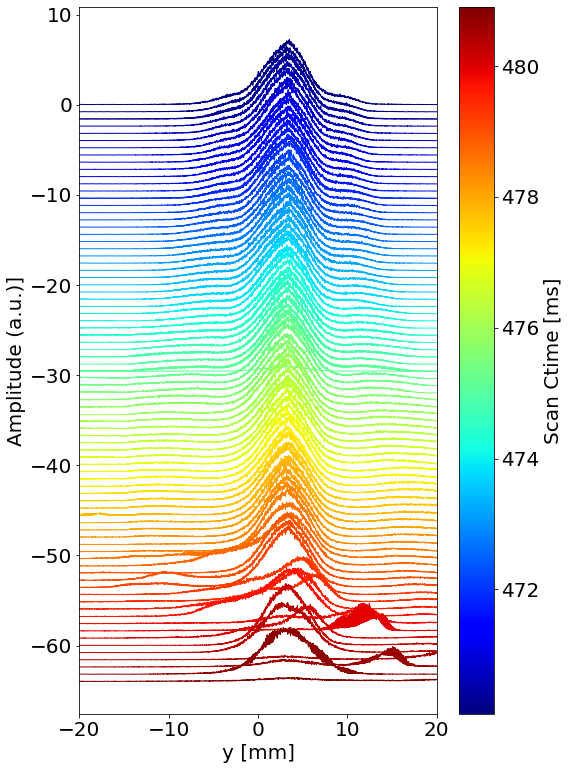

In [20]:
f, ax = plt.subplots(1,1,figsize=(8,13))
fontsize=20
ax.set_xlabel('y [mm]', fontsize=fontsize)
ax.set_ylabel('Amplitude (a.u.)]', fontsize=fontsize)
ax.tick_params(axis='both', labelsize=fontsize)
cmap = cm.jet
scan_times = np.unique(df4['scan_time_ms'])
scan_times = scan_times[np.where(scan_times<481)[0]]
colors = cmap(np.linspace(0,1,len(scan_times)))
shifts = np.arange(0,len(scan_times),1)

for c,scan_time,ii in zip(colors, scan_times, shifts):
    dftemp = df4[df4['scan_time_ms']==scan_time]
    for i in range(len(dftemp)):
        ax.plot(dftemp.iloc[i]['pos_raw'], dftemp.iloc[i]['amp_raw']/1e4-0.8*ii, c=c, lw=1)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min(scan_times), vmax=max(scan_times)))
cbar=plt.colorbar(sm, ax=ax)
cbar.ax.tick_params(labelsize=fontsize)
cbar.set_label('Scan Ctime [ms]', fontsize=fontsize)
    
ax.set_xlim(-20,20)
#ax.set_ylim(0)

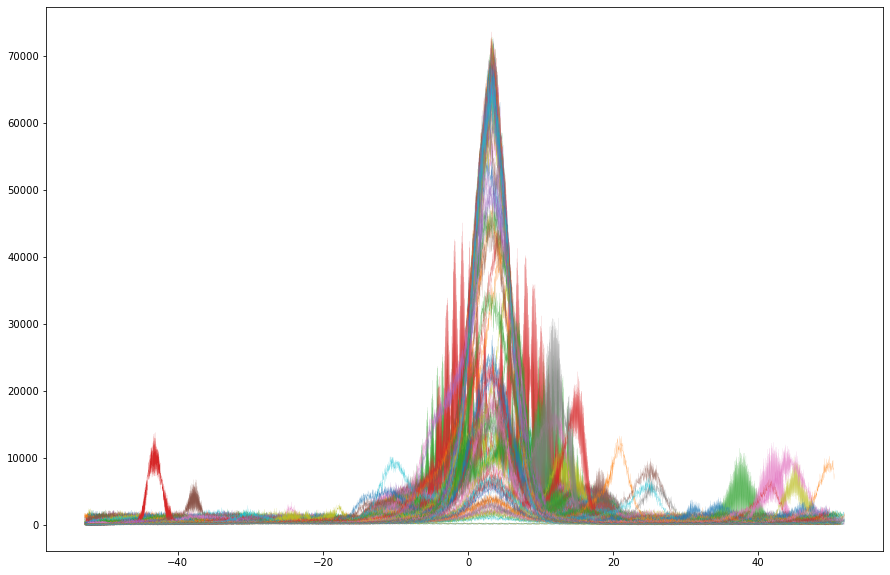

In [21]:
plt.figure(figsize=(15,10))
for i in range(len(df2)):
    plt.plot(df2['pos_raw'].iloc[i], df2['amp_raw'].iloc[i], lw=0.1)